In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score

In [2]:
column_header=["State","Account Length","Area Code","Phone","International Plan","VMail Plan","VMail Message","Day Mins","Day Calls","Day Charge","Eve Mins","Eve Calls","Eve Charge","Night Mins","Night Calls","Night Charge","International Mins","International calls","International Charge","CustServ Calls","Churn"]

In [3]:
data=pd.read_csv("telecom_churn_data.csv", delimiter=",",header=None,names=column_header,index_col=False)

In [4]:
data.head()

,State,Account Length,Area Code,Phone,International Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,International Mins,International calls,International Charge,CustServ Calls,Churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4617 entries, 0 to 4616
Data columns (total 21 columns):
State                   4617 non-null object
Account Length          4617 non-null int64
Area Code               4617 non-null int64
Phone                   4617 non-null object
International Plan      4617 non-null object
VMail Plan              4617 non-null object
VMail Message           4617 non-null int64
Day Mins                4617 non-null float64
Day Calls               4617 non-null int64
Day Charge              4617 non-null float64
Eve Mins                4617 non-null float64
Eve Calls               4617 non-null int64
Eve Charge              4617 non-null float64
Night Mins              4617 non-null float64
Night Calls             4617 non-null int64
Night Charge            4617 non-null float64
International Mins      4617 non-null float64
International calls     4617 non-null int64
International Charge    4617 non-null float64
CustServ Calls          4617 non-null

In [6]:
data.describe()

,Account Length,Area Code,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,International Mins,International calls,International Charge,CustServ Calls
count,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000
mean,100.645224,437.046350,7.849903,180.447152,100.054364,30.676576,200.429088,100.179770,17.036703,200.623933,99.944120,9.028185,10.279294,4.433831,2.775926,1.567035
std,39.597194,42.288212,13.592333,53.983540,19.883027,9.177145,50.557001,19.821314,4.297332,50.543616,19.935053,2.274488,2.757361,2.457615,0.744413,1.307019
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,12.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,165.900000,87.000000,14.100000,167.100000,87.000000,7.520000,8.600000,3.000000,2.320000,1.000000
50%,100.000000,415.000000,0.000000,180.000000,100.000000,30.600000,200.800000,101.000000,17.070000,200.800000,100.000000,9.040000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,17.000000,216.800000,113.000000,36.860000,234.000000,114.000000,19.890000,234.900000,113.000000,10.570000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,351.500000,165.000000,59.760000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [9]:
from collections import Counter

In [11]:
Counter(data.Churn)

Counter({' False.': 3961, ' True.': 656})

In [12]:
%matplotlib inline

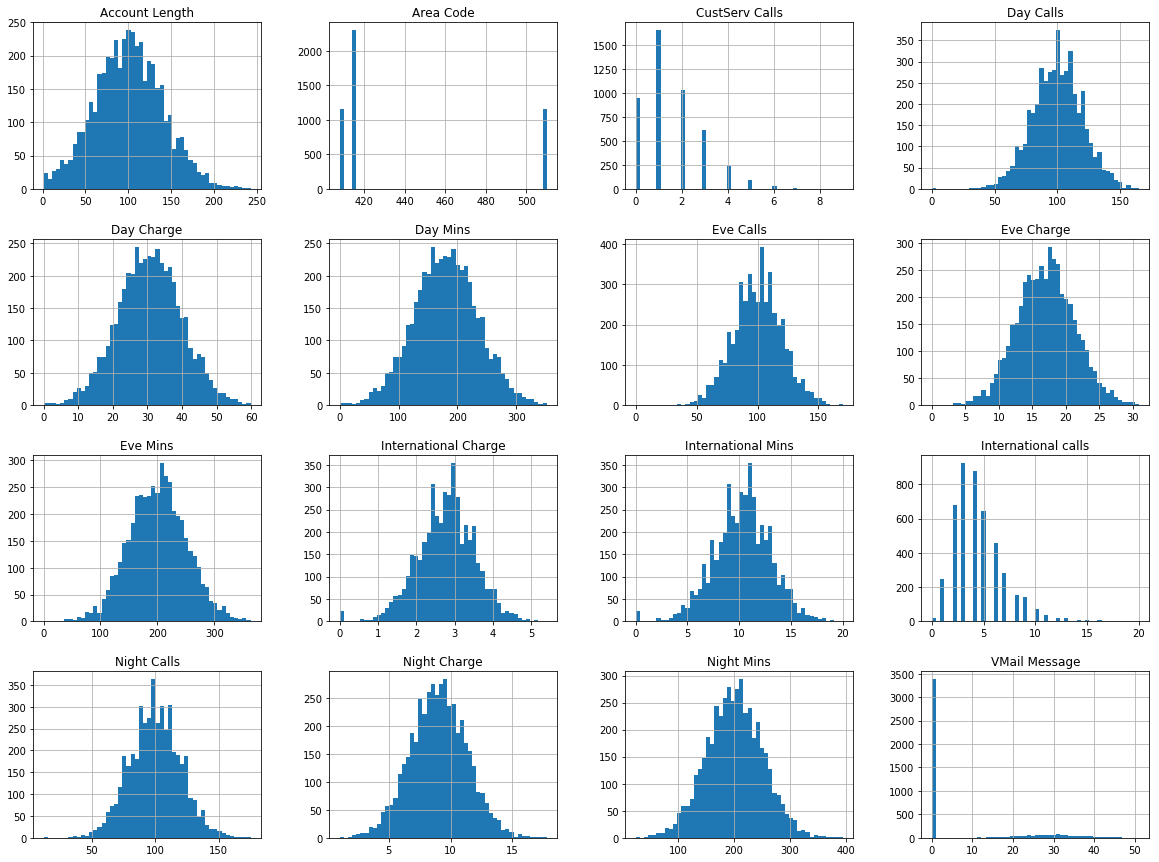

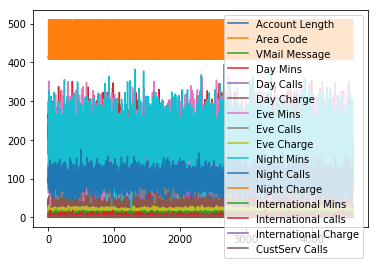

In [13]:
data.hist(bins=50, figsize=(20,15))
data.plot()

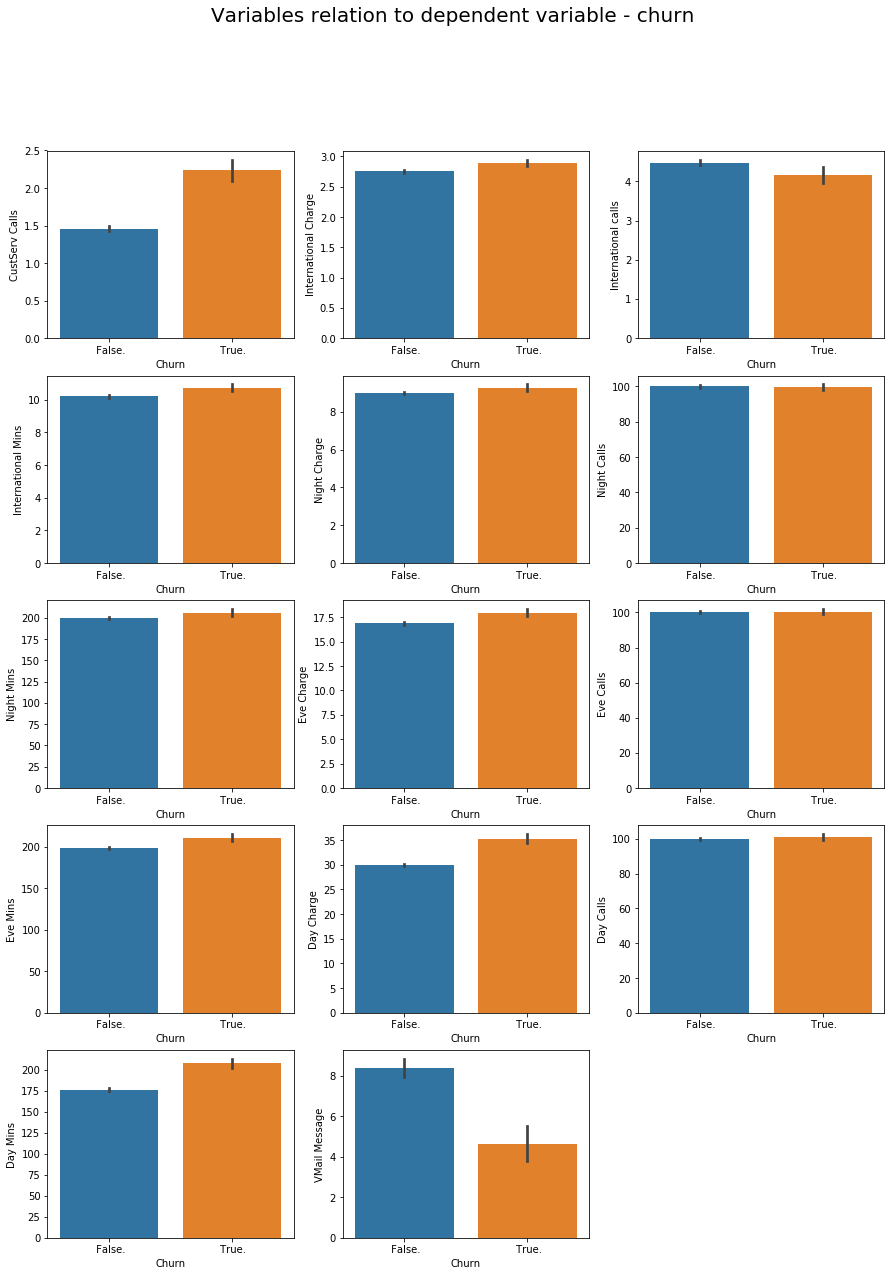

In [14]:
plt.figure(figsize = (15,20))
plt.subplot(5,3,1)
sns.barplot(data['Churn'], data['CustServ Calls'])
plt.subplot(5,3,2)
sns.barplot(data['Churn'], data['International Charge'])
plt.subplot(5,3,3)
sns.barplot(data['Churn'], data['International calls'])
plt.subplot(5,3,4)
sns.barplot(data['Churn'], data['International Mins'])
plt.subplot(5,3,5)
sns.barplot(data['Churn'], data['Night Charge'])
plt.subplot(5,3,6)
sns.barplot(data['Churn'], data['Night Calls'])
plt.subplot(5,3,7)
sns.barplot(data['Churn'], data['Night Mins'])
plt.subplot(5,3,8)
sns.barplot(data['Churn'], data['Eve Charge'])
plt.subplot(5,3,9)
sns.barplot(data['Churn'], data['Eve Calls'])
plt.subplot(5,3,10)
sns.barplot(data['Churn'], data['Eve Mins'])
plt.subplot(5,3,11)
sns.barplot(data['Churn'], data['Day Charge'])
plt.subplot(5,3,12)
sns.barplot(data['Churn'], data['Day Calls'])
plt.subplot(5,3,13)
sns.barplot(data['Churn'], data['Day Mins'])
plt.subplot(5,3,14)
sns.barplot(data['Churn'], data['VMail Message'])
plt.suptitle("Variables relation to dependent variable - churn", fontsize = 20)
plt.show()

In [15]:
data_1=data.drop(["Area Code","Phone"],axis=1)

In [16]:
data_1['International calls'] = np.sqrt(data_1['International calls'])
data_1['CustServ Calls'] = np.sqrt(data_1['CustServ Calls'])
data_1['VMail Message'] = np.sqrt(data_1['VMail Message'])

In [17]:
data_1=pd.get_dummies(data_1, columns=['State'])
del data_1['State_WY'] #n-1 dummies

In [18]:
X = data_1.drop(['Churn'],axis=1).values
y = data_1['Churn'].values

In [19]:
from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()
X[:, 1] = labelencoder_X.fit_transform(X[:, 1])
X[:, 2] = labelencoder_X.fit_transform(X[:, 2])

In [20]:
labelencoder_y = LabelEncoder()
y=labelencoder_y.fit_transform(y)

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [22]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

C:\Users\SURAJ\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\SURAJ\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\SURAJ\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [23]:
def accuracy_precision(cm):
    tp, fn, fp, tn = cm.ravel()
    accuracy=(tp+tn)/cm.sum()
    specificity=tn/(tn+fp)
    precision=tp/(tp+fp)
    recall=tp/(tp+fn)
    print("Accuracy: %s" %accuracy)
    print("Specificity: %s" %specificity)
    print("Precision: %s" %precision)
    print("Recall: %s" %recall)

In [25]:
#Random forest algorithm

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
classifier=RandomForestClassifier(random_state=33,n_estimators=23)

parameters=[{'min_samples_split':[2,3,4],'criterion':['gini','entropy'],'min_samples_leaf':[1,2,3]}]
grid_search_rf=GridSearchCV(estimator=classifier, param_grid=parameters, scoring='accuracy',cv=10)
grid_search_rf.fit(X_train,y_train)

best_parameters=grid_search_rf.best_params_
probs=grid_search_rf.predict_proba(X_test)

In [26]:
probs[0:10]

array([[1.        , 0.        ],
       [0.86956522, 0.13043478],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.65217391, 0.34782609],
       [0.95652174, 0.04347826],
       [1.        , 0.        ],
       [0.30434783, 0.69565217],
       [0.95652174, 0.04347826],
       [0.95652174, 0.04347826]])

In [27]:
best_parameters

{'criterion': 'gini', 'min_samples_leaf': 1, 'min_samples_split': 2}

In [28]:
import pandas as pd
y_train_predict=grid_search_rf.predict(X_train)
cm_train=confusion_matrix(y_train,y_train_predict)
accuracy_precision(cm_train)

Accuracy: 0.9991334488734835
Specificity: 0.9939879759519038
Precision: 0.9989885367498315
Recall: 1.0


In [29]:
y_test_predict=grid_search_rf.predict(X_test)
cm_test=confusion_matrix(y_test,y_test_predict)
accuracy_precision(cm_test)

Accuracy: 0.9558441558441558
Specificity: 0.7133757961783439
Precision: 0.9566055930568949
Recall: 0.9939879759519038


In [30]:
confusion_matrix = pd.DataFrame(confusion_matrix(y_test, y_test_predict), 
    columns=["Predicted False", "Predicted True"], 
    index=["Actual False", "Actual True"])
confusion_matrix

,Predicted False,Predicted True
Actual False,992,6
Actual True,45,112


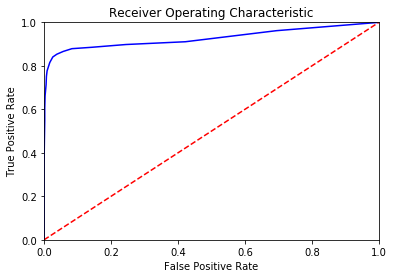

In [31]:
fpr, tpr, threshold = roc_curve(y_test, probs[:,1])
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [32]:
roc_auc_score(y_test,y_test_predict)

0.8536818860651237